As in linear regression we have dealt with continuous variables , in logistic regression we will be dealing with categorical variables. Although it is called regression but we will perform a classification 
here , yes no , true false etc etc. Let's understand the core of it.

In [37]:
#importing the dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# creating a dataframe that stores watchtime of youtube video per user and if they have subscribed or not to youtube premium
users = ['user 1','user 2','user 3','user 4','user 5','user 1','user 2','user 3','user 4','user 5','user 1','user 2','user 3','user 4','user 5']
watchtime = [98,150,34,25,102,98,150,34,25,102,98,150,34,25,102,98,150,34,25,102]
subscribed = ['Yes','Yes','No','No','Yes','Yes','Yes','No','No','Yes','Yes','Yes','No','No','Yes']
data = list(zip(users,watchtime,subscribed))
df = pd.DataFrame(data,columns=['users','watchtime','subscribed'])

In [39]:
df.head()

,users,watchtime,subscribed
0,user 1,98,Yes
1,user 2,150,Yes
2,user 3,34,No
3,user 4,25,No
4,user 5,102,Yes


In [40]:
# now here our target variable is 'subscribed' , the result we want as output is categorized as binary - 'yes and no' and its not a continuous variable. Hence linear regression will not work here
# let's perform data spliting first here in x y

x = df[['users','watchtime']]
y = df[['subscribed']]

In [41]:
x.head()

,users,watchtime
0,user 1,98
1,user 2,150
2,user 3,34
3,user 4,25
4,user 5,102


In [42]:
y.head()

,subscribed
0,Yes
1,Yes
2,No
3,No
4,Yes


In [43]:
# now we can clearly see that the user column doesn't affect our target prediction , hence let's go ahead and drop the same.
x.drop(['users'],axis=1,inplace = True)

C:\Users\sengu\AppData\Local\Temp\ipykernel_15068\2243144440.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(['users'],axis=1,inplace = True)


In [44]:
x.head()

,watchtime
0,98
1,150
2,34
3,25
4,102


In [45]:
# Now we will use a standard scaler to scale our data for further processing
from sklearn.preprocessing import StandardScaler

st_x = StandardScaler()
x = st_x.fit_transform(x)

In [46]:
x

array([[ 0.3480404 ],
       [ 1.4652071 ],
       [-1.02693401],
       [-1.22028978],
       [ 0.4339763 ],
       [ 0.3480404 ],
       [ 1.4652071 ],
       [-1.02693401],
       [-1.22028978],
       [ 0.4339763 ],
       [ 0.3480404 ],
       [ 1.4652071 ],
       [-1.02693401],
       [-1.22028978],
       [ 0.4339763 ]])

In [47]:
x = pd.DataFrame(x,columns=['watchtime'])

In [48]:
x.head()

,watchtime
0,0.348040
1,1.465207
2,-1.026934
3,-1.220290
4,0.433976


In [49]:
#it's time for train test splitting
from sklearn.model_selection import train_test_split

In [50]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [51]:
xtrain.head()

,watchtime
9,0.433976
0,0.348040
11,1.465207
5,0.348040
13,-1.220290


In [52]:
ytrain

,subscribed
9,Yes
0,Yes
11,Yes
5,Yes
13,No
6,Yes
1,Yes
14,Yes
2,No
10,Yes


In [53]:
xtest

,watchtime
7,-1.026934
8,-1.220290
12,-1.026934


In [54]:
ytest

,subscribed
7,No
8,No
12,No


In [55]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [56]:
lr.fit(xtrain,ytrain)

c:\Users\sengu\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [57]:
lr.score(xtrain,ytrain)

1.0

In [58]:
y_pred= lr.predict(xtest)  

In [62]:
#now we will develop a confusion matrix to find out the true and false positives and negatives
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(ytest,y_pred)  

In [63]:
cm

array([[3]], dtype=int64)

In [68]:
from sklearn import metrics
y_pred

array(['No', 'No', 'No'], dtype=object)

ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of ticklabels (2).

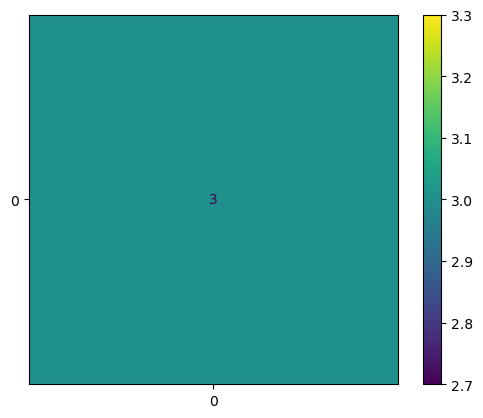

In [66]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()